<a href="https://colab.research.google.com/github/asimds/26DECOPFAIL/blob/main/CLEANED_MSG_ANALYSIS%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_pickle('/content/drive/MyDrive/26Dec21/data')

In [4]:
df.head()

,MOBILE_NUMBER,TIMESTAMP,STATUS,CAUSE,LATENCY_MINUTES,SMSTYPE,NUMBER_MESSAGES,MESSAGE_TYPE,MSG_DELIVERED
0,9958839124,2021-06-05 16:03:31,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 16:03:31
1,6204839638,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57
2,6201108256,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57
3,8435178035,2021-06-05 20:41:59,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:59
4,8435178035,2021-06-05 20:42:00,Delivered,Delivered,0.1,TEXT,1,OTP,2021-06-05 20:42:06


In [5]:
df.shape

(20032982, 9)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

IndexError: ignored

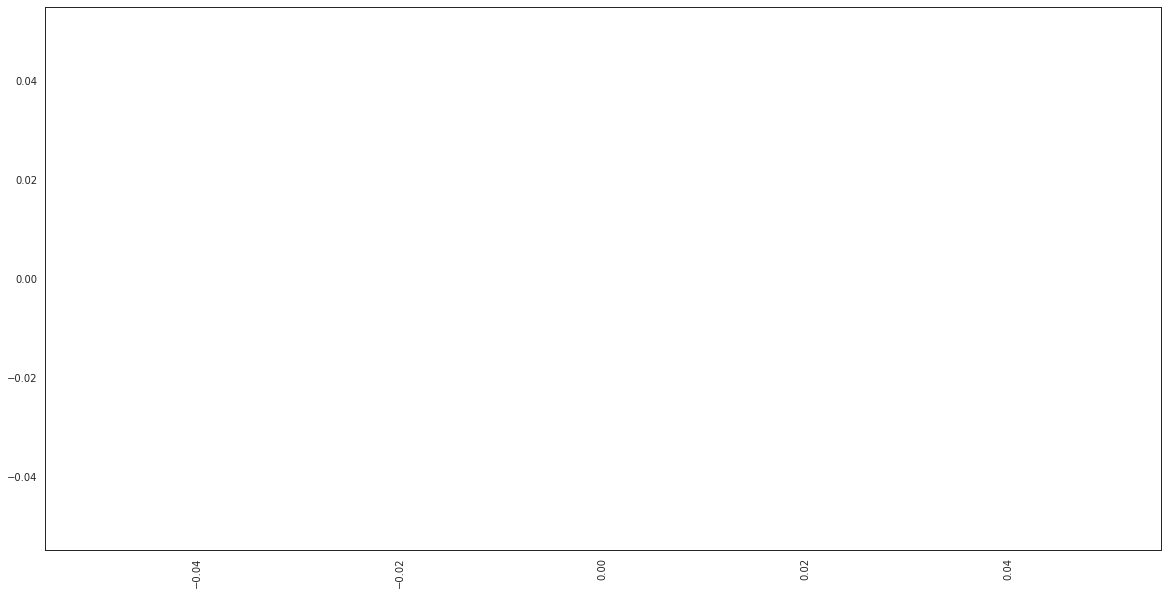

In [11]:
# Plot all the Missing Values in Decending Order
%matplotlib inline
missing_values = ((df1.isna().sum())/df1.shape[0])*100

missing_values.sort_values(ascending=False,inplace = True)
missing_values = missing_values.drop(missing_values[missing_values == 0].index)

color=['powderblue']

plt.figure(figsize=(20,10))
missing_values.plot.bar(color = color)
plt.xlabel('Features(Columns)')
plt.ylabel('% Missing value missing')
plt.title('Bar Graph for Missing Feature Percentage ')

plt.show()

In [6]:
df.isna().sum()

MOBILE_NUMBER            0
TIMESTAMP                0
STATUS                   0
CAUSE                    0
LATENCY_MINUTES    2645675
SMSTYPE                  0
NUMBER_MESSAGES          0
MESSAGE_TYPE             0
MSG_DELIVERED      2645675
dtype: int64

In [5]:
df.CAUSE.value_counts()

Delivered                  15246595
Number not reachable        4308155
Operator System Failure      438275
Template Blacklisted          39415
Number Blocked                  273
Number Blocked by User          259
Template Not Found               10
Name: CAUSE, dtype: int64

In [7]:
df1=df.dropna()

In [8]:
df1.shape

(17387307, 9)

In [9]:
df1.CAUSE.value_counts()

Delivered                  15246595
Number not reachable        1872189
Operator System Failure      237948
Template Blacklisted          30307
Number Blocked by User          259
Template Not Found                9
Name: CAUSE, dtype: int64

In [10]:
#Saving final cleaned dataset
df1.to_pickle('/content/drive/MyDrive/26Dec21/final_cleaned_data')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17387307 entries, 0 to 20189959
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   MOBILE_NUMBER    object        
 1   TIMESTAMP        datetime64[ns]
 2   STATUS           object        
 3   CAUSE            object        
 4   LATENCY_MINUTES  float64       
 5   SMSTYPE          object        
 6   NUMBER_MESSAGES  int64         
 7   MESSAGE_TYPE     object        
 8   MSG_DELIVERED    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 1.3+ GB


In [12]:
df1['MSG_DELIVERED']=df1['MSG_DELIVERED'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17387307 entries, 0 to 20189959
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   MOBILE_NUMBER    object        
 1   TIMESTAMP        datetime64[ns]
 2   STATUS           object        
 3   CAUSE            object        
 4   LATENCY_MINUTES  float64       
 5   SMSTYPE          object        
 6   NUMBER_MESSAGES  int64         
 7   MESSAGE_TYPE     object        
 8   MSG_DELIVERED    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.3+ GB


In [14]:
import dateutil

def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )


In [15]:
df1['part_of_day'] = df1.MSG_DELIVERED.apply(lambda x: get_part_of_day(dateutil.parser.parse(x).hour))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
#Saving final cleaned dataset
df1.to_pickle('/content/drive/MyDrive/26Dec21/final_cleaned_data')

In [1]:
import pandas as pd
df1= pd.read_pickle('/content/drive/MyDrive/26Dec21/final_cleaned_data')

In [14]:
df1.head()

,MOBILE_NUMBER,TIMESTAMP,STATUS,CAUSE,LATENCY_MINUTES,SMSTYPE,NUMBER_MESSAGES,MESSAGE_TYPE,MSG_DELIVERED,part_of_day,Week_Number
0,9958839124,2021-06-05 16:03:31,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 16:03:31.000000000,afternoon,22
1,6204839638,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57.000000000,evening,22
2,6201108256,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57.000000000,evening,22
3,8435178035,2021-06-05 20:41:59,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:59.000000000,evening,22
4,8435178035,2021-06-05 20:42:00,Delivered,Delivered,0.1,TEXT,1,OTP,2021-06-05 20:42:06.000000000,evening,22


In [18]:
df1.part_of_day.value_counts()

afternoon    9475840
evening      6727818
morning       702614
night         481035
Name: part_of_day, dtype: int64

In [19]:
df1.tail()

,MOBILE_NUMBER,TIMESTAMP,STATUS,CAUSE,LATENCY_MINUTES,SMSTYPE,NUMBER_MESSAGES,MESSAGE_TYPE,MSG_DELIVERED,part_of_day
20189955,9420243613,2021-11-25 16:20:43,Delivered,Delivered,3.2,TEXT,2,CIBIL OVERDUE,2021-11-25 16:23:55.000000000,afternoon
20189956,9420243613,2021-11-25 16:40:34,Delivered,Delivered,23.1,TEXT,2,CIBIL OVERDUE,2021-11-25 17:03:40.000000000,afternoon
20189957,9420243613,2021-11-25 16:27:52,Delivered,Delivered,10.3,TEXT,2,CIBIL OVERDUE,2021-11-25 16:38:10.000000000,afternoon
20189958,8595716066,2021-11-25 17:33:01,Delivered,Delivered,10.8,TEXT,1,OTP,2021-11-25 17:43:49.000000000,afternoon
20189959,7260090467,2021-11-25 18:52:23,Delivered,Delivered,17.7,TEXT,1,OTP,2021-11-25 19:10:05.000000000,evening


In [4]:
df1['Week_Number'] = df1['TIMESTAMP'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [5]:
df1.head()

,MOBILE_NUMBER,TIMESTAMP,STATUS,CAUSE,LATENCY_MINUTES,SMSTYPE,NUMBER_MESSAGES,MESSAGE_TYPE,MSG_DELIVERED,part_of_day,Week_Number
0,9958839124,2021-06-05 16:03:31,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 16:03:31.000000000,afternoon,22
1,6204839638,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57.000000000,evening,22
2,6201108256,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57.000000000,evening,22
3,8435178035,2021-06-05 20:41:59,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:59.000000000,evening,22
4,8435178035,2021-06-05 20:42:00,Delivered,Delivered,0.1,TEXT,1,OTP,2021-06-05 20:42:06.000000000,evening,22


In [6]:
df1.Week_Number.value_counts()

41    1521918
25    1374483
44    1307914
27    1121089
36    1066321
35    1035762
39    1014412
24     983248
26     897309
31     839257
28     817477
32     814115
37     768078
34     665568
46     607704
43     567834
33     449513
40     366778
30     298464
45     237887
38     188824
42     178895
29     136620
47     107449
23      14487
22       5901
Name: Week_Number, dtype: int64

In [25]:
df1.describe()

,LATENCY_MINUTES,NUMBER_MESSAGES,Week_Number
count,1.738731e+07,1.738731e+07,1.738731e+07
mean,1.580413e+01,1.126418e+00,3.435914e+01
std,3.039317e+01,3.324072e-01,6.877081e+00
min,0.000000e+00,1.000000e+00,2.200000e+01
25%,3.800000e+00,1.000000e+00,2.700000e+01
50%,8.000000e+00,1.000000e+00,3.500000e+01
75%,1.650000e+01,1.000000e+00,4.100000e+01
max,7.098000e+02,3.000000e+00,4.700000e+01


In [2]:
df1.shape

(17387307, 11)

In [3]:
# extract year, month, day and week of year from "Date"

df1['MSG_DELIVERED']=pd.to_datetime(df1['MSG_DELIVERED'])
df1['MONTH'] = df1['MSG_DELIVERED'].apply(lambda x: x.month)
df1['DAY'] = df1['MSG_DELIVERED'].apply(lambda x: x.day)
df1['WEEK_OF_YEAR'] = df1['MSG_DELIVERED'].apply(lambda x: x.weekofyear)

In [4]:
df1.head()

,MOBILE_NUMBER,TIMESTAMP,STATUS,CAUSE,LATENCY_MINUTES,SMSTYPE,NUMBER_MESSAGES,MESSAGE_TYPE,MSG_DELIVERED,part_of_day,Week_Number,MONTH,DAY,WEEK_OF_YEAR
0,9958839124,2021-06-05 16:03:31,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 16:03:31,afternoon,22,6,5,22
1,6204839638,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57,evening,22,6,5,22
2,6201108256,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57,evening,22,6,5,22
3,8435178035,2021-06-05 20:41:59,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:59,evening,22,6,5,22
4,8435178035,2021-06-05 20:42:00,Delivered,Delivered,0.1,TEXT,1,OTP,2021-06-05 20:42:06,evening,22,6,5,22


In [5]:
df1.drop('Week_Number', axis=1, inplace=True)

In [7]:
df1.head()

,MOBILE_NUMBER,TIMESTAMP,STATUS,CAUSE,LATENCY_MINUTES,SMSTYPE,NUMBER_MESSAGES,MESSAGE_TYPE,MSG_DELIVERED,part_of_day,MONTH,DAY,WEEK_OF_YEAR
0,9958839124,2021-06-05 16:03:31,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 16:03:31,afternoon,6,5,22
1,6204839638,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57,evening,6,5,22
2,6201108256,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57,evening,6,5,22
3,8435178035,2021-06-05 20:41:59,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:59,evening,6,5,22
4,8435178035,2021-06-05 20:42:00,Delivered,Delivered,0.1,TEXT,1,OTP,2021-06-05 20:42:06,evening,6,5,22


In [26]:
#Saving final cleaned dataset
df1.to_pickle('/content/drive/MyDrive/26Dec21/final_cleaned_data')

In [9]:
df1.head(4)

,MOBILE_NUMBER,TIMESTAMP,STATUS,CAUSE,LATENCY_MINUTES,SMSTYPE,NUMBER_MESSAGES,MESSAGE_TYPE,MSG_DELIVERED,part_of_day,MONTH,DAY,WEEK_OF_YEAR
0,9958839124,2021-06-05 16:03:31,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 16:03:31,afternoon,6,5,22
1,6204839638,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57,evening,6,5,22
2,6201108256,2021-06-05 20:41:57,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:57,evening,6,5,22
3,8435178035,2021-06-05 20:41:59,Delivered,Delivered,0.0,TEXT,1,OTP,2021-06-05 20:41:59,evening,6,5,22


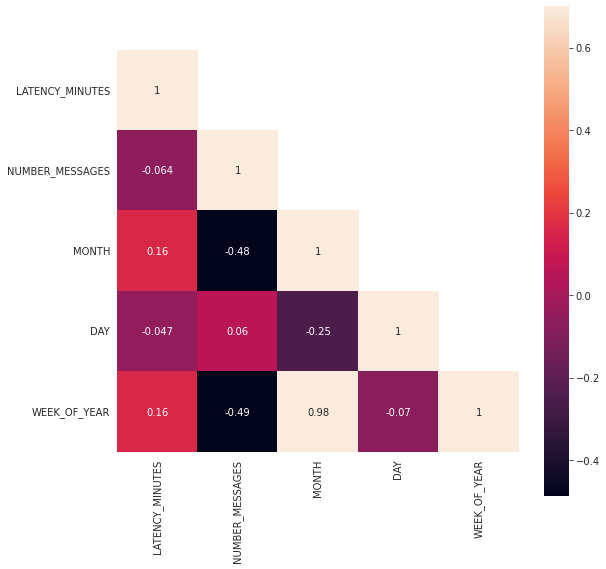

In [27]:
correlation_map = df1[df1.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

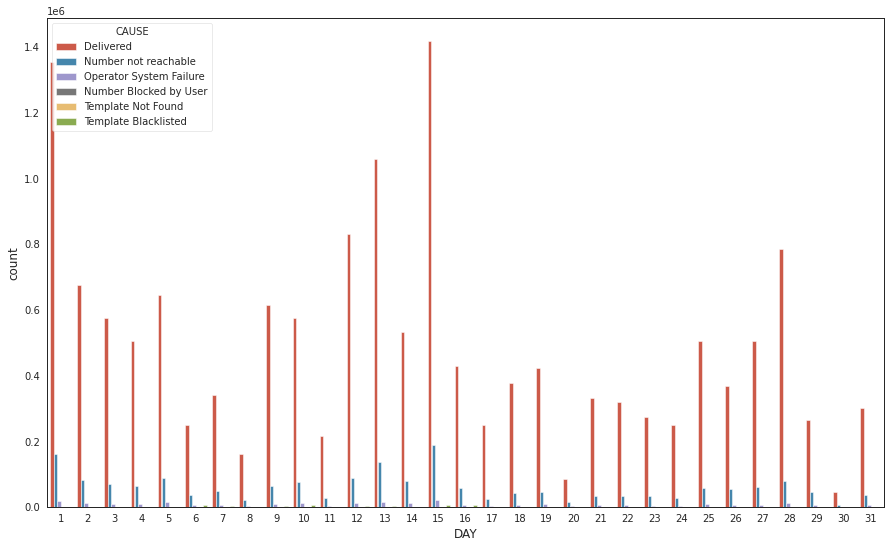

In [19]:
plt.subplots(figsize=(15,9))
sns.countplot(x='DAY',hue='CAUSE',data=df1);

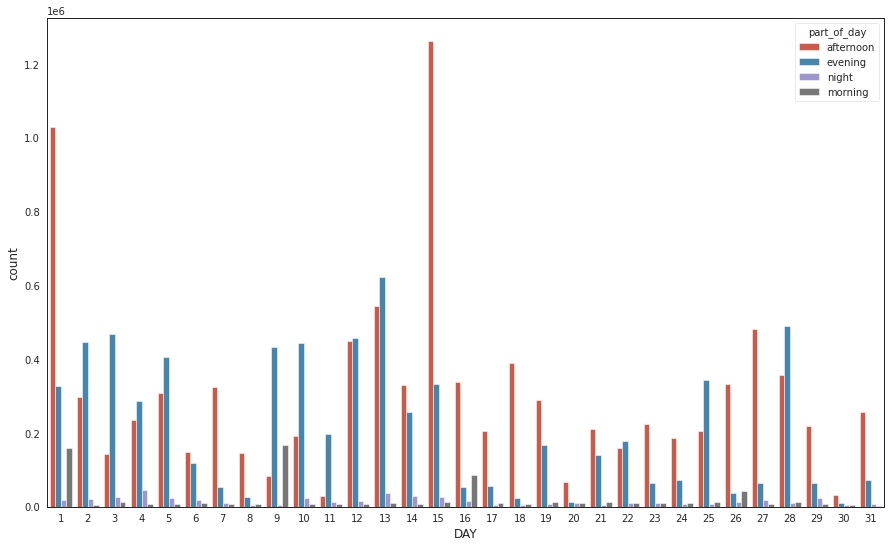

In [25]:
plt.subplots(figsize=(15,9))
sns.countplot(x='DAY',hue='part_of_day',data=df1);

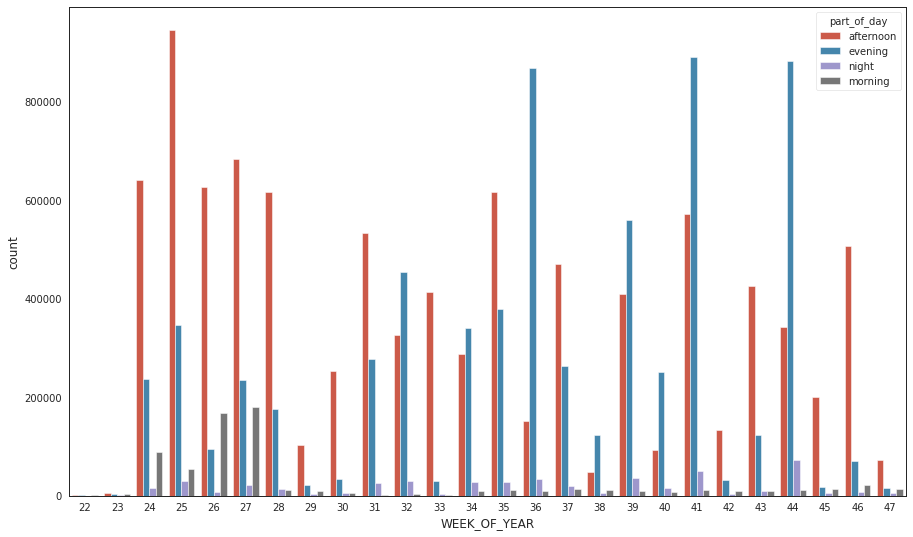

In [28]:
plt.subplots(figsize=(15,9))
sns.countplot(x='WEEK_OF_YEAR',hue='part_of_day',data=df1);

In [ ]:
plt.subplots(figsize=(15,9))
sns.scatterplot(x='LATENCY_MINUTES',y='NUMBER_MESSAGES',hue='MESSAGE_TYPE',data=df1,);